In [1]:
import numpy as np

## Conjugate Gradient

In [1]:
def conjugate_gradient(A, b, x0, tol=1e-8, num_epochs=100):
    x = []
    x.append(x0)
    r0 = b - A.dot(x[0].reshape(1, -1).T) # 2*1
    r = r0
    v = r
    for k in range(num_epochs):
        alpha = v.T.dot(r) / v.T.dot(A).dot(v)
        x.append((x[k] + alpha * v.T).flatten())
        
        r = r - alpha * A.dot(v)
        if np.linalg.norm(r)**2 < tol * np.linalg.norm(r0)**2:
            print("The number of iteration: {}".format(k + 1))
            break
            
        v = r - (A.dot(v).T.dot(r) / v.T.dot(v)) * v
    return x[k+1], x

## Min $f(x, y) = \left(x + 2 y - 7\right)^{2} + \left(2 x + y - 5\right)^{2}$

$\left[\begin{matrix}10 & 8\\8 & 10\end{matrix}\right]$

In [179]:
A = np.array([[10, 8], [8, 10]])
b = np.array([[34], [38]])

In [180]:
mini, minis = conjugate_gradient(A, b, np.array([-10, -10]), num_epochs=500)
mini

The number of iteration: 10


array([1.00414883, 2.99716609])

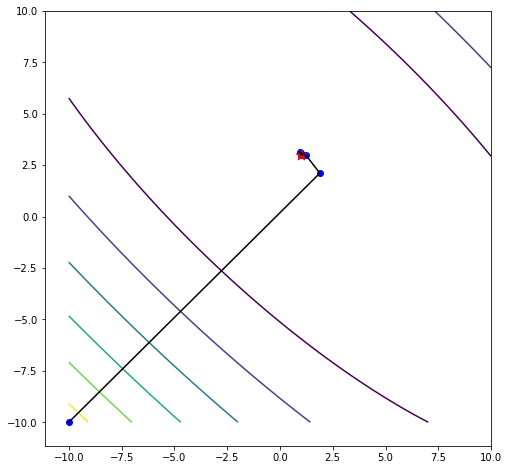

In [181]:
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = (X + 2 * Y - 7)**2 + (2 * X + Y - 5)**2

plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z)
for m in minis:
    plt.scatter(m[0], m[1], c="blue")
plt.plot(np.array(minis)[:,0], np.array(minis)[:,1], 'black')
plt.scatter(mini[0], mini[1], c="red", marker="*", s=120)
plt.show()